# Transformer

- Defintion:
   - `Input→Transformer→Output` a novel architecture that aims to solve `seq2seq` tasks.
   - Rely on *self-attention* to compute representations of its input and output without using sequence-aligned RNNs or convolution.(CNN/RNN)
   - `Bert` is build based on `Transformer`.
   - **Self Attention**
      - focus on parts of our `input sequence` while we pridict our output sequence with some connection/correlation
- Structure:
   - Combined with **6** encoder-decoder
   - Inside Structure of Decoder and Encoder map:
   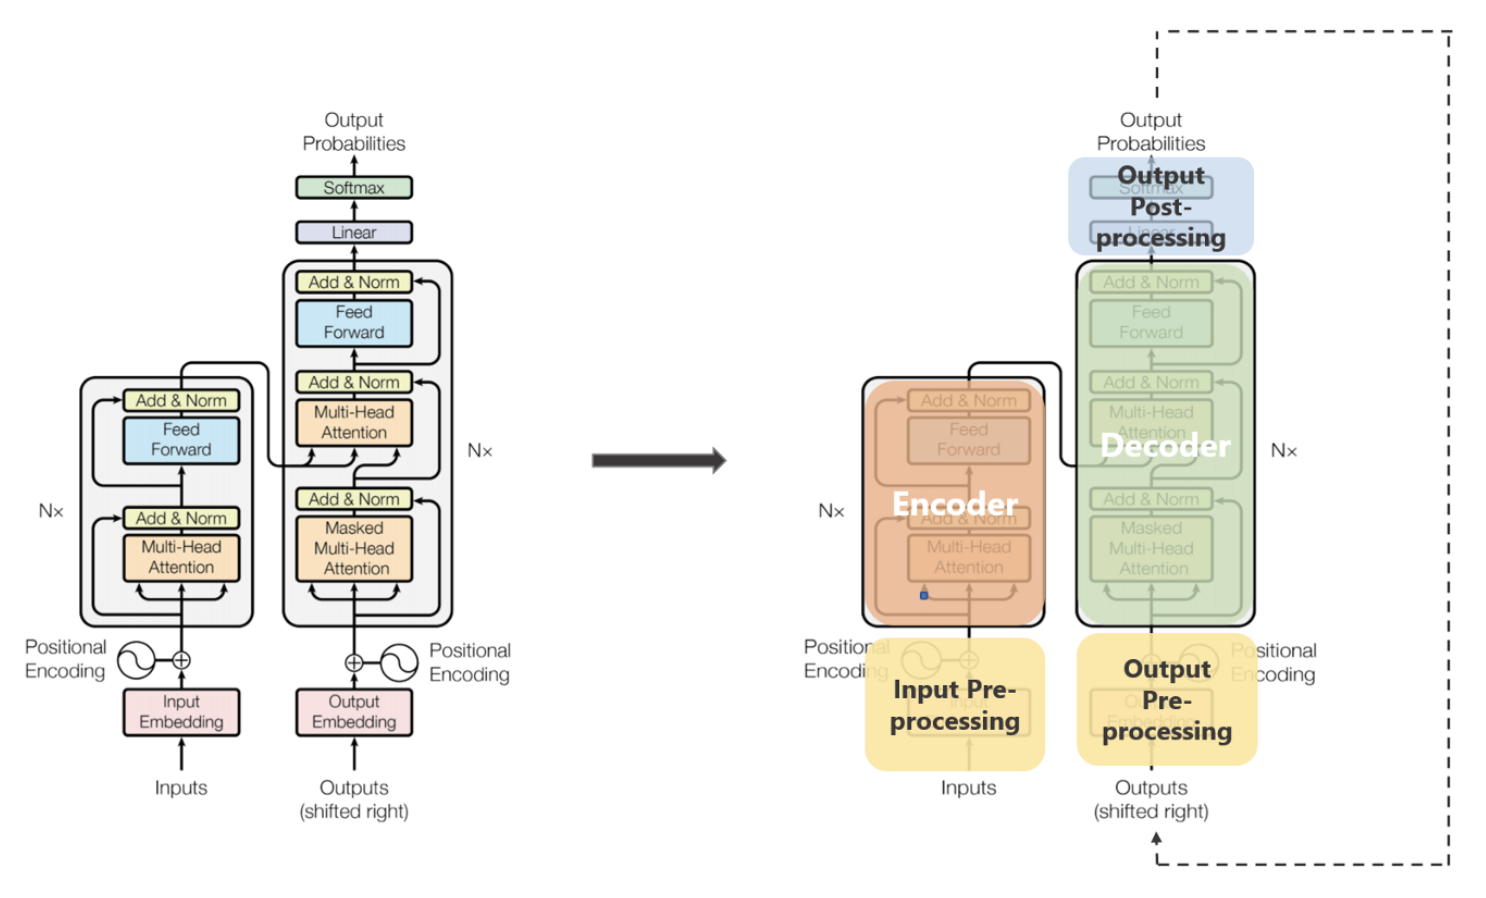



- Three Kinds of Attention in this model:
   - **Encoder-Decoder Attention**: attention between encoder and decoder.
   - **Self-attention in Input Sequence**: attends all the words in the input sequence
   - **Self-attention in Output Sequence**: to prevent *information leakage*, self-attention is only limited to the words that occur before a given word by masking words that occur after it.
- EG: "The animal didn't cross the street because it was too tired" How to judgy whether "it" represents animal or street? Self-attention makes the machine combine "it" and "animal" together. Calculating the self attention for #i input word:

   1. three vectors with Input vector(X), weight matrices (W)
      - Query Vector:`q= X * Wq`. Think of this as the *current word*.
      - Key Vector: `k= X * Wk`. As an *unique indexing* mechanism for Value vector.
      - Value Vector:`v= X * Wv`. Think of this as the *information* in the input word.
      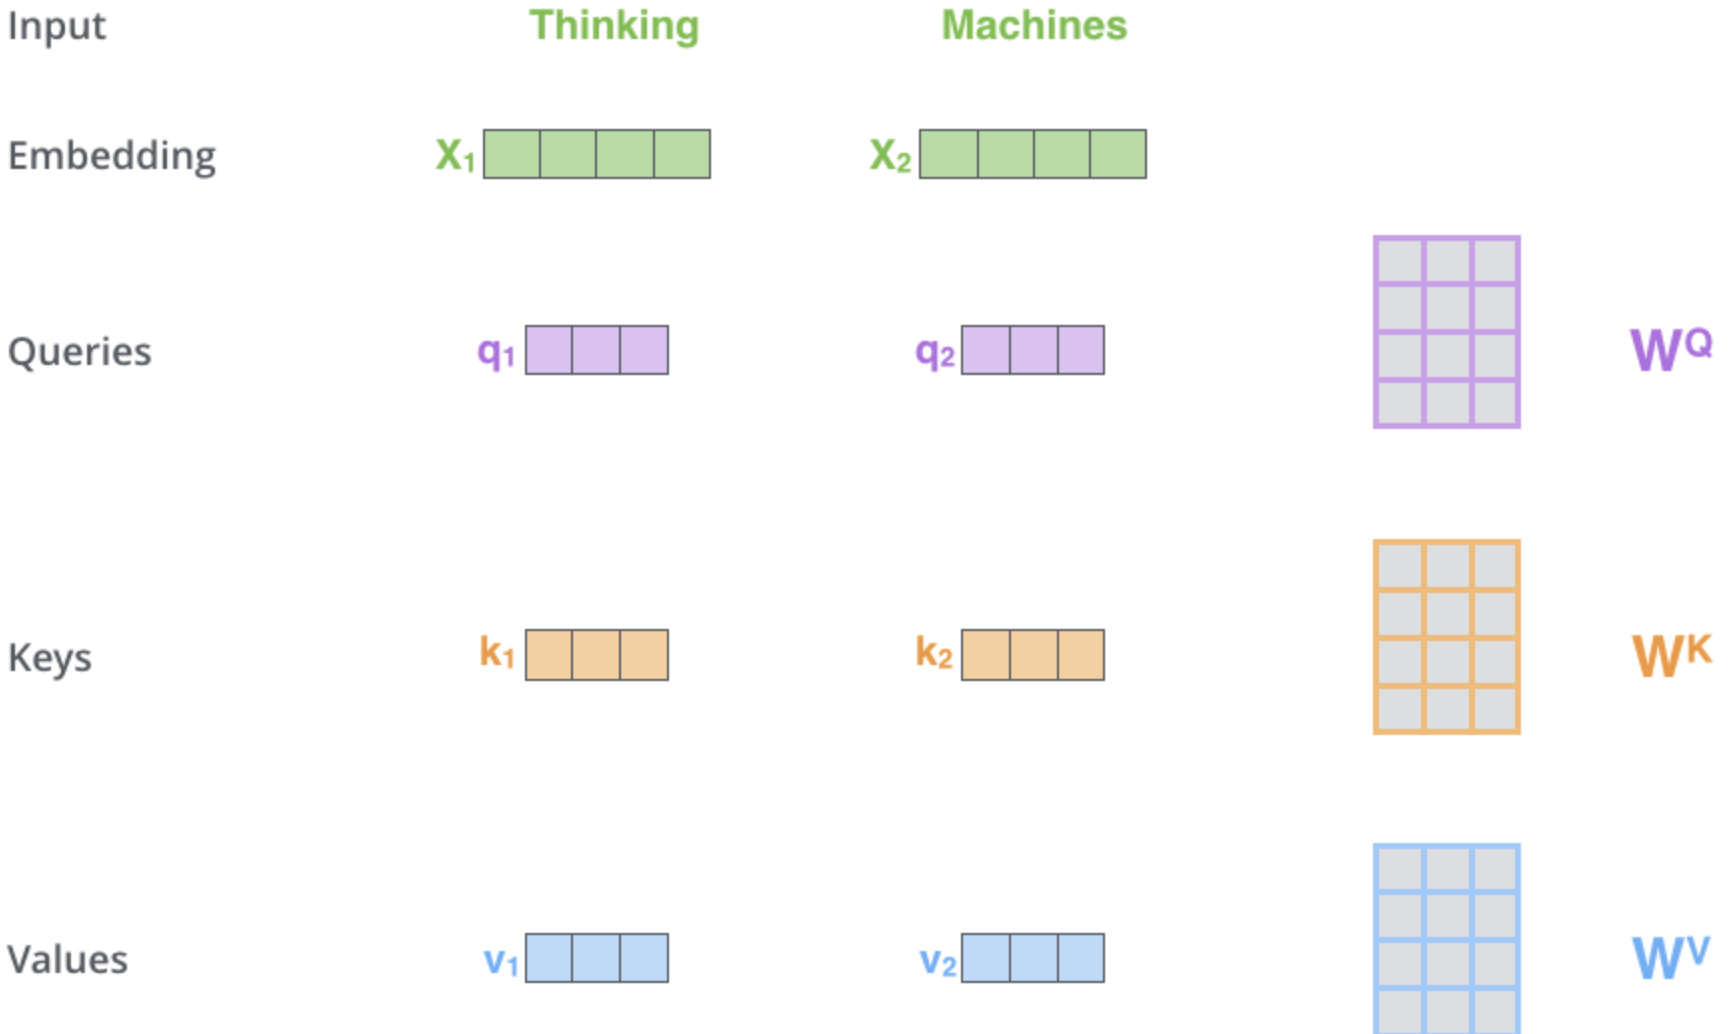

   2. **Dot-Product Score**: Take query q and find the most similar key k. The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position.
     - **qi*kj** : closest query-key product will have the highest value
   3. **Get a Better Gradient Flow (more smaller gradient flow)**: divid dot-product by squre root of key vector dimension.
   4. **Normalization** by `Softmax` operation: 
     - softmax that will drive the q.k with *smaller values* close to **0** and the *larger values* towards **1**. 
     - Result: The value vectors multiplied with ~1 will **get more attention** while the ones ~0 will get less.
     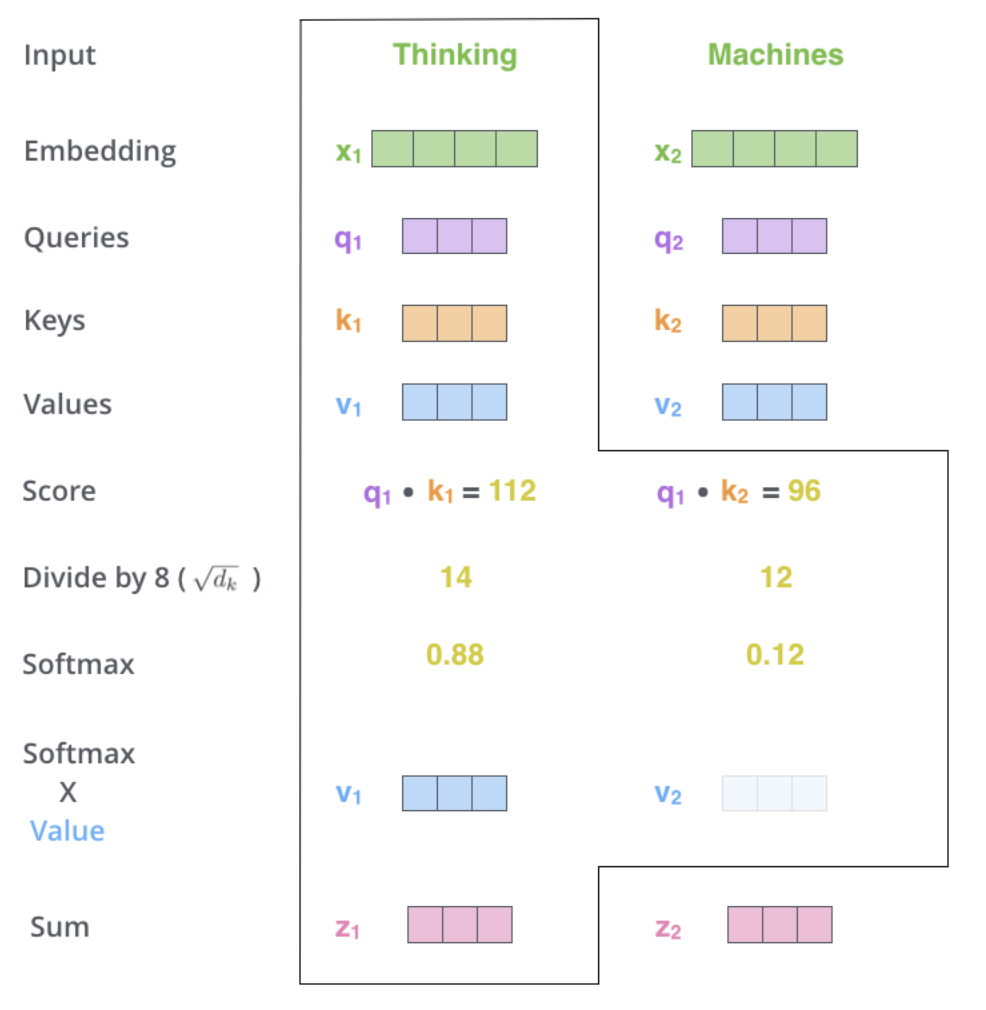
     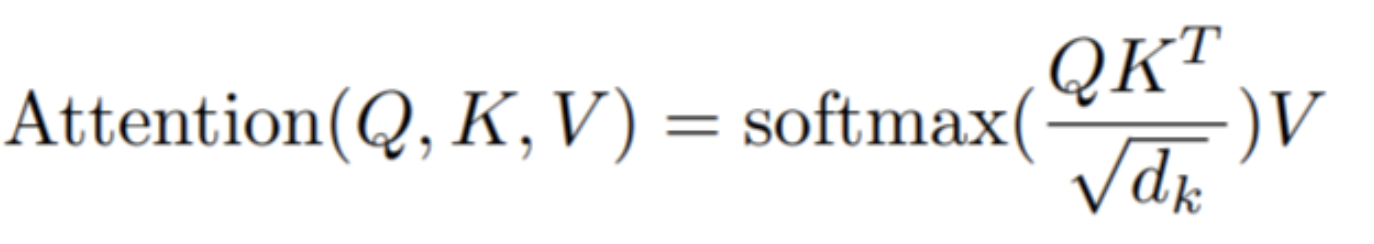


# Encoder Structure:
  - Overall Picture: `Self-Attention layer-(result)--> Feed-Forward Neural Network`
  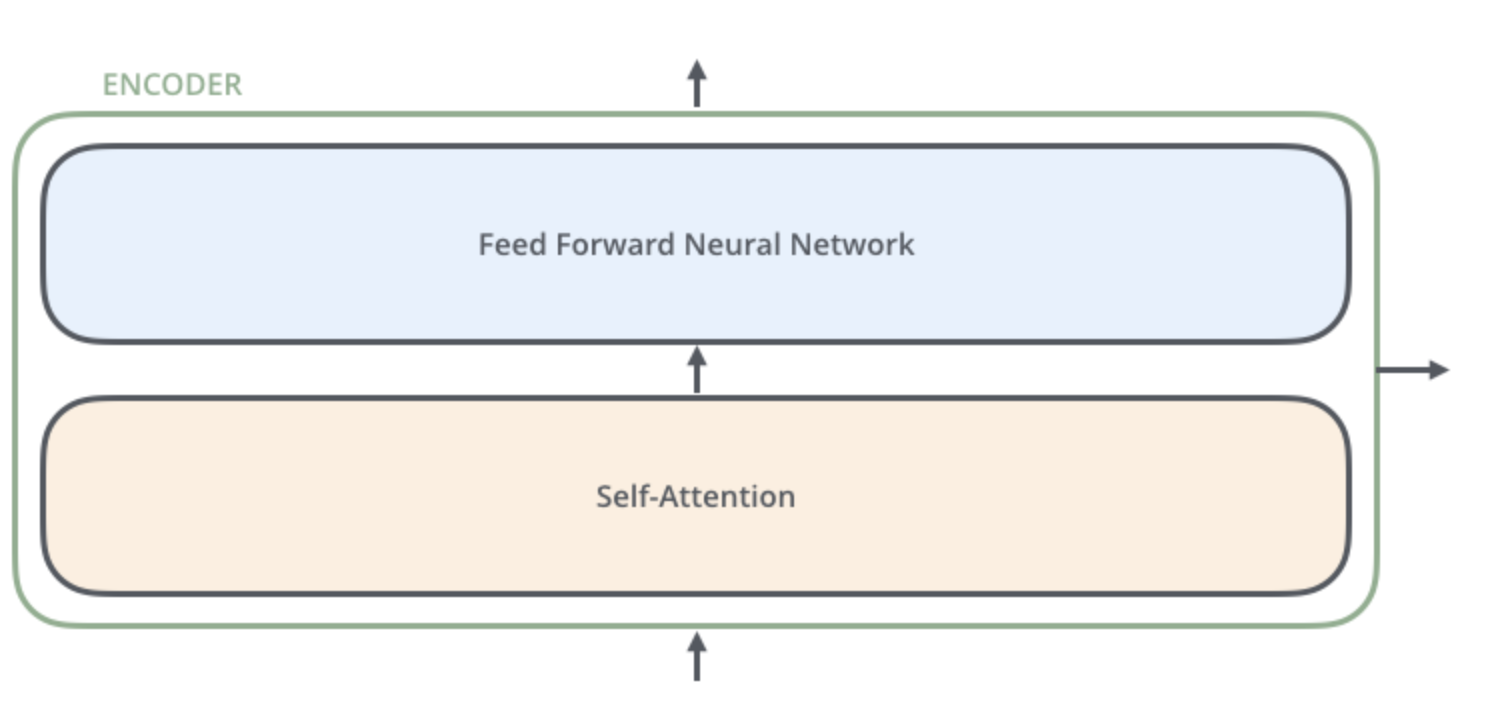


   - **Positional Encoding**: Representing The Order of The Sequence
     - Dimension of positonal encoding is the same as embedding
     - The vector decides the *position* of each word or the distance between different words in the sequence. 
     
     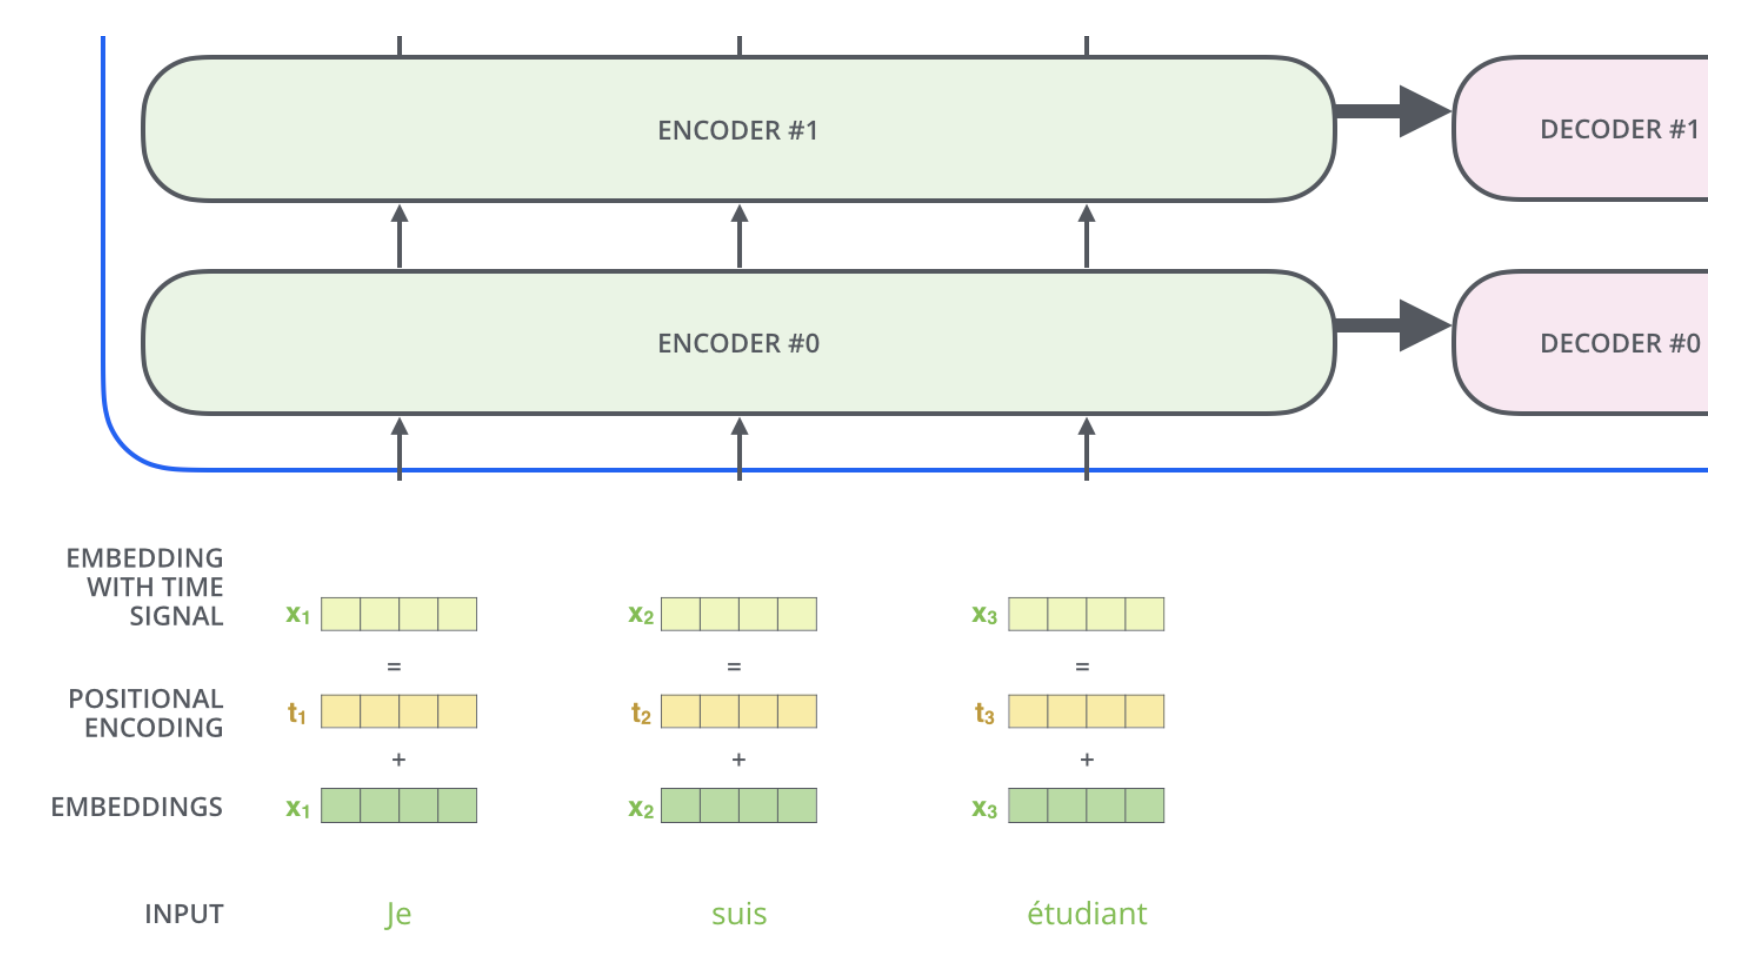
     - code:`get_timing_signal_1d()`
     -Algorithm for calculating distance:
       - pos:the postion of the word in the sentence
       - i: index
     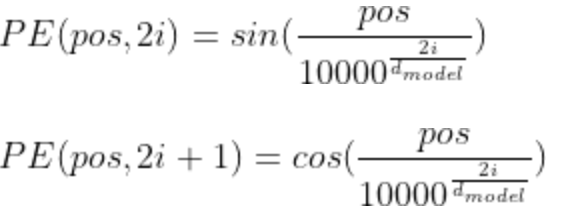

  - The Residuals:
     - each self-attention,ffnn in each encoder has a residual connection around it. And follwed by layer-normalization step.
     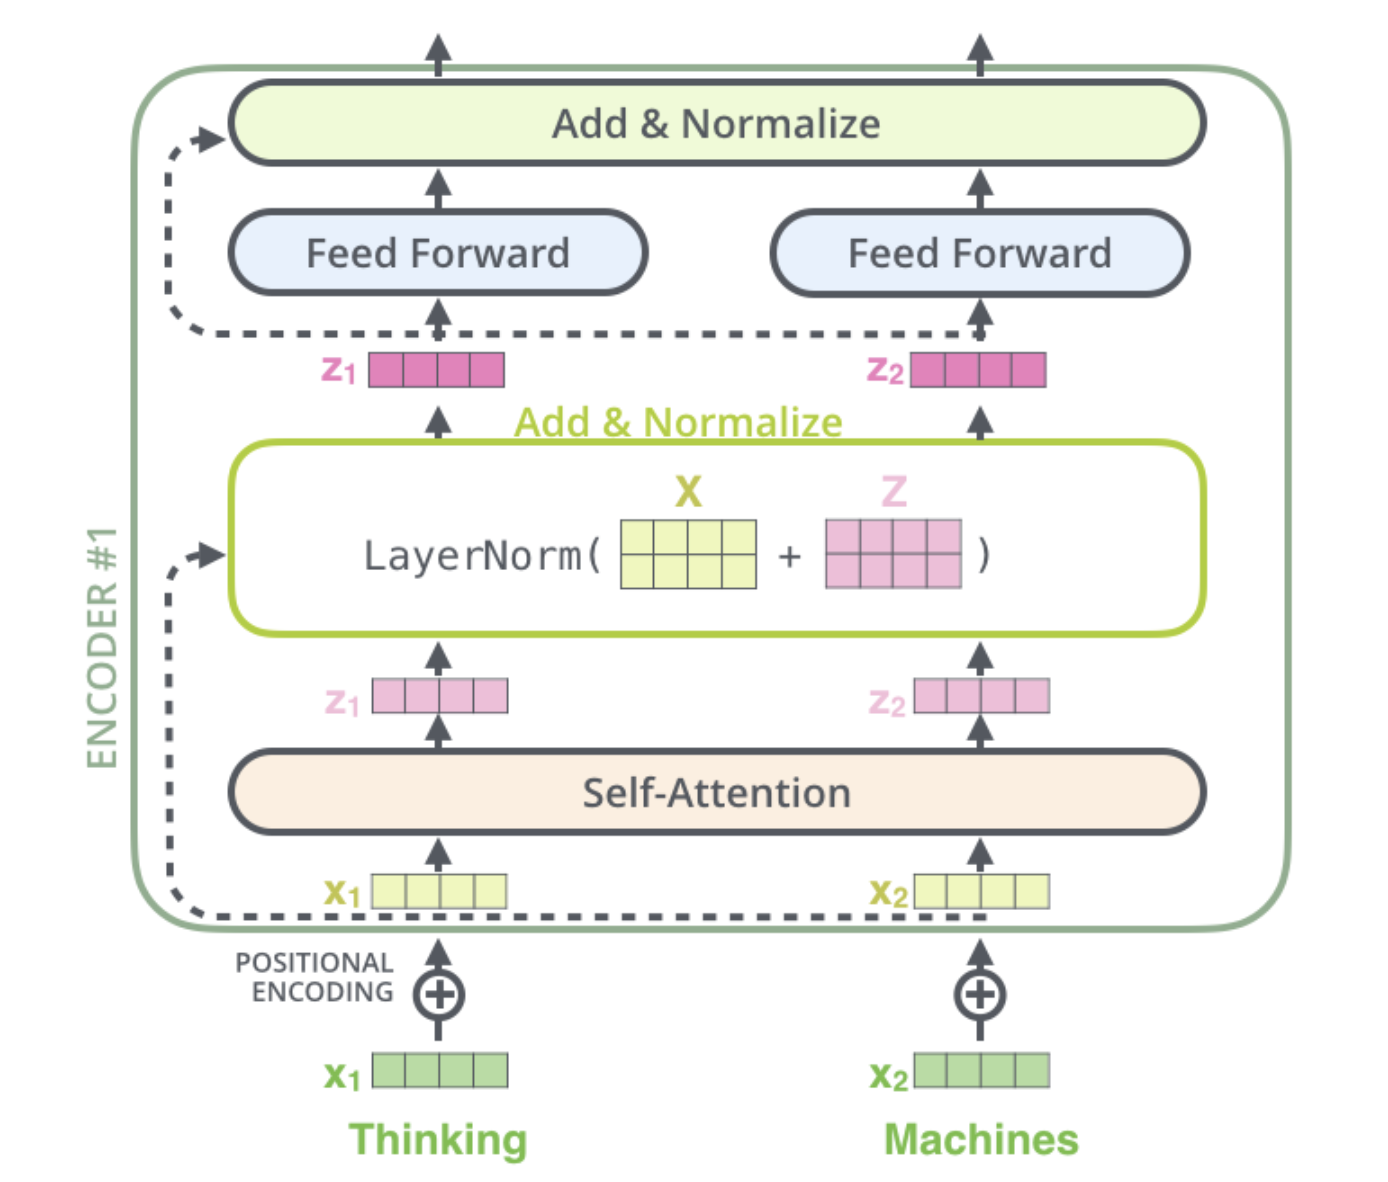 
     - The goal of normalization: convert input data into the distribution with mean=0,variance=1 before sent to activation function for speeding up training.

  - **Batch Normalization**:Normalize across each min-batch, independently for each feature.
  - **Layer normalization**:Normalize across features, independently for each sample.
  - Formular and Structure:
  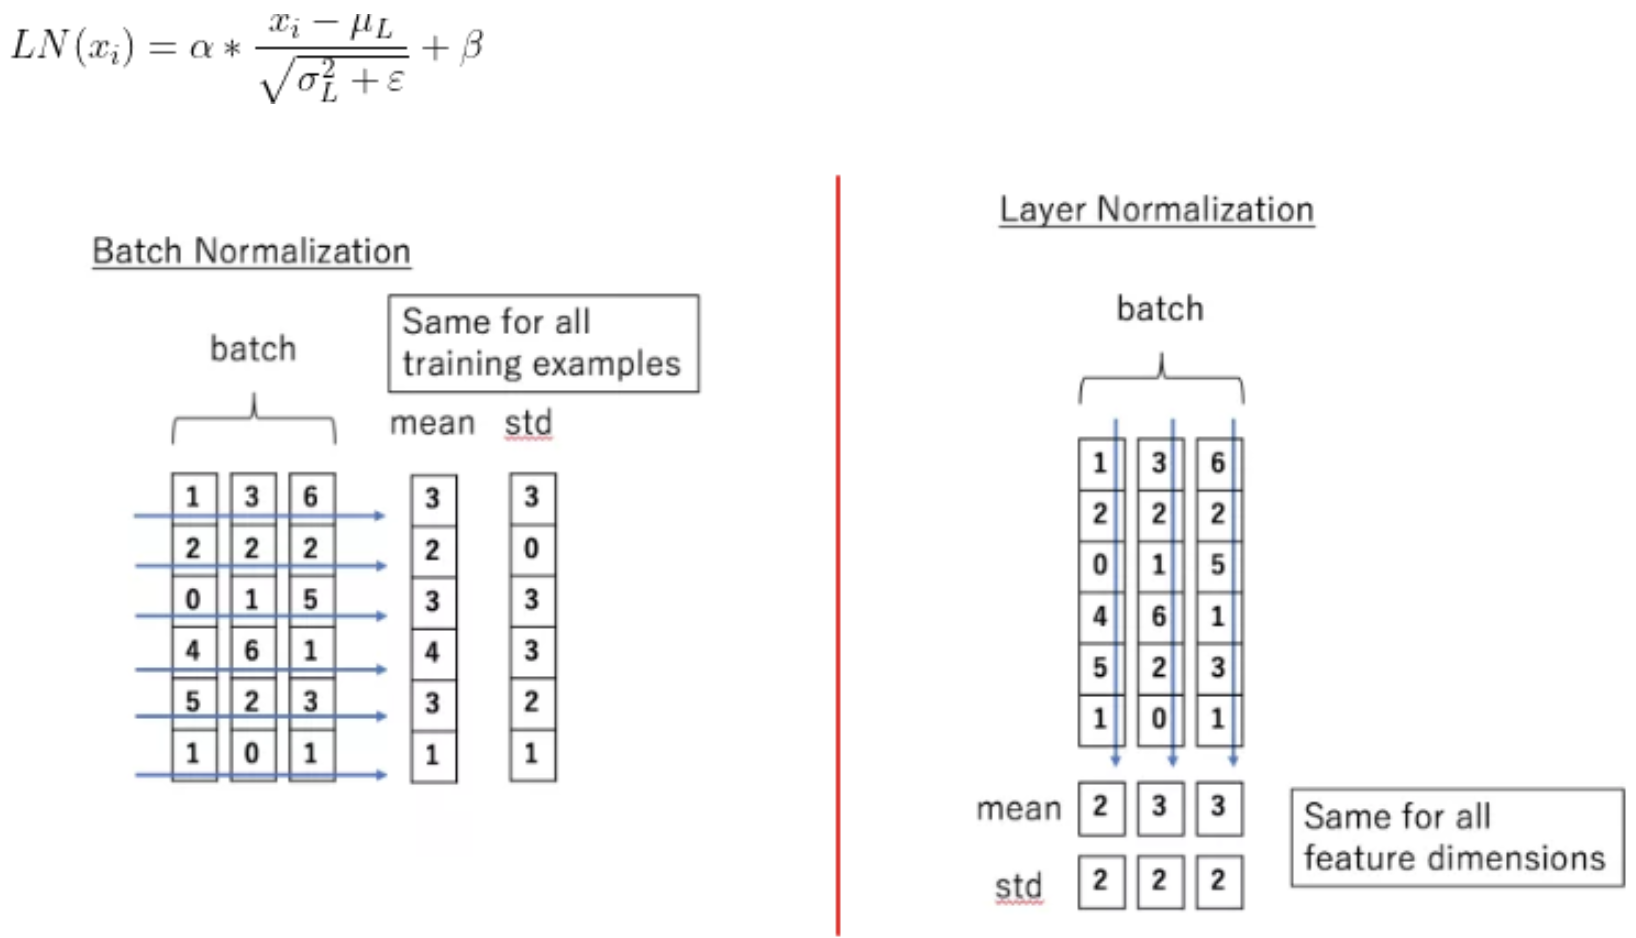

In [ ]:
#Code Model: Add a batch normalization layer in keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

model = Sequential([
    Dense(units=10, input_shape=(1,4), activation='relu'),
    # add batchnorm layer after activations in the previous layer
    BatchNormalization(axis=1),
    # pre-activations at the dense layer below are Gaussians
    Dense(units=16, activation='relu'),
    BatchNormalization(axis=1),
    Dense(units=4, activation='softmax')
])

In [ ]:
#Code Model: Add a layer normalization layer in keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LayerNormalization

model = Sequential([
    Dense(units=16, input_shape=(1,10), activation='relu'),
    LayerNormalization(axis=1),
    Dense(units=10, activation='relu'),
    LayerNormalization(axis=1),
    Dense(units=3, activation='softmax')
])

- Feed Forward Neural Network (FFNN)
  - How to get Z-Matrix to input multi-headed attention matrices(in the paper, it uses 8 matrix)?
  - Steps:
     - Concatenate all the attention heads into one matrix multiply with the **weight matrix W**
     - We get the result Z matrix that contain information from all the attention heads. We can send this forward to FFNN.
 - Graph: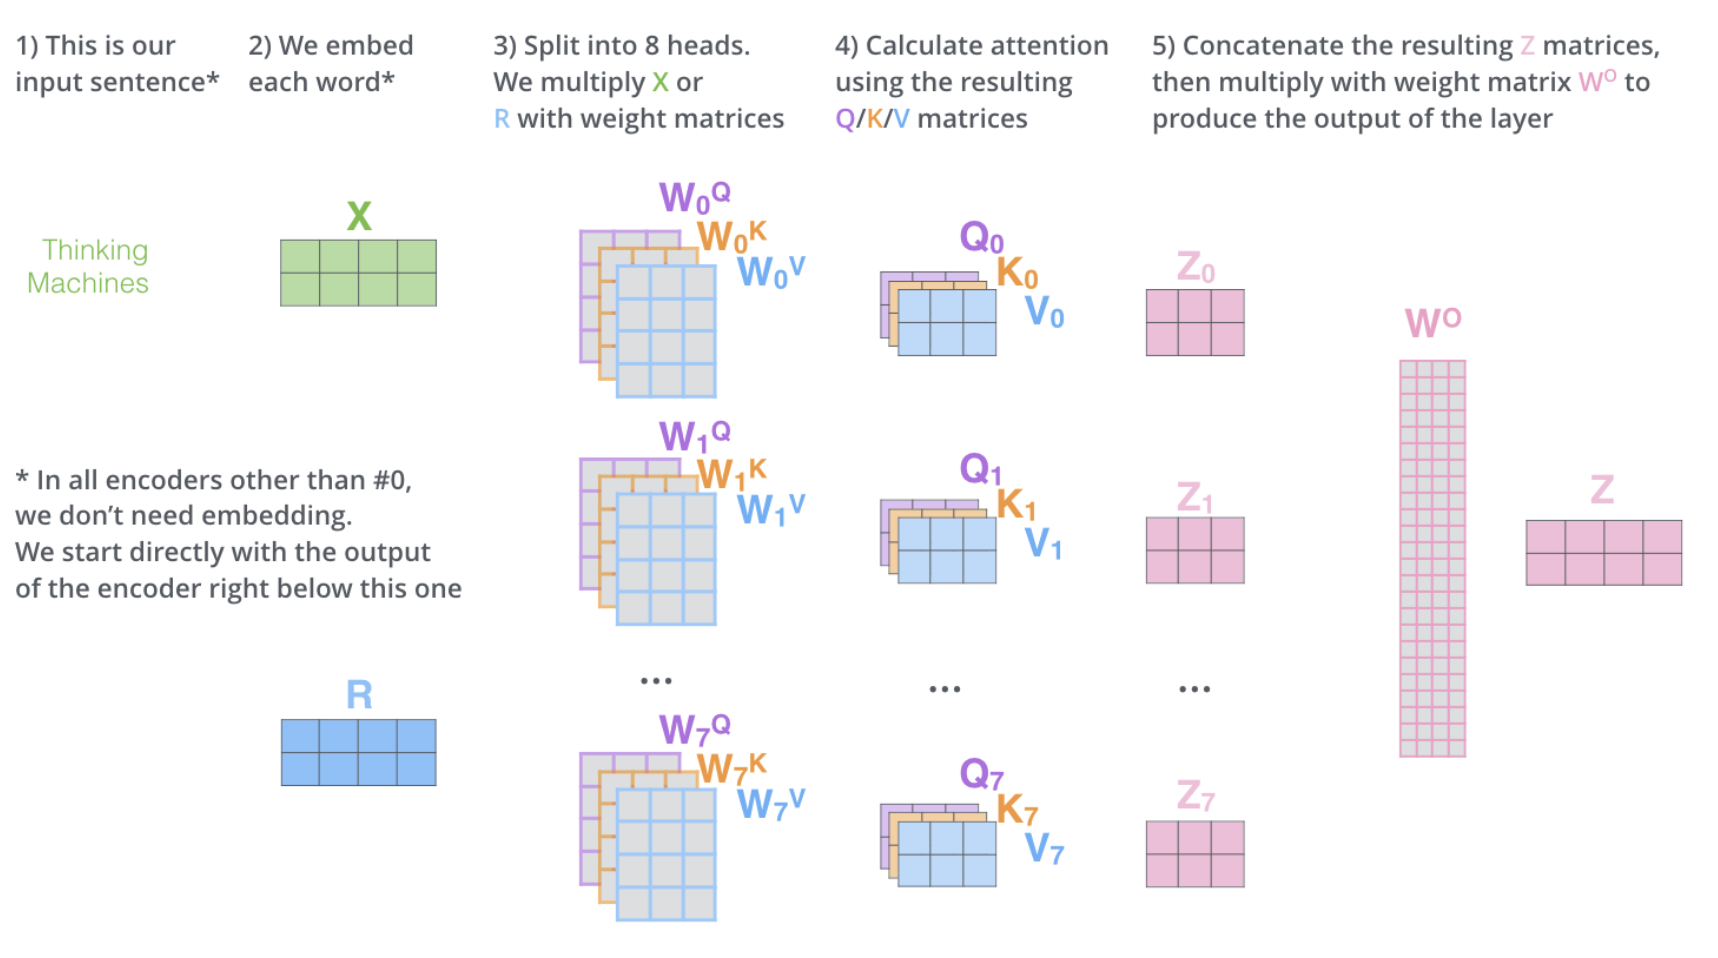

# Multi-Headed Attention
- Defintion: Instead of only performing one single attention function, it is better to linearly project the queries, keys, and values *h* times, performing the attention function *in parallel*, yeilding dv dimensional output values.
- The reduced dimension of each head, the total computational cost is similar to that of single-head attention.
- Formular and Structure:
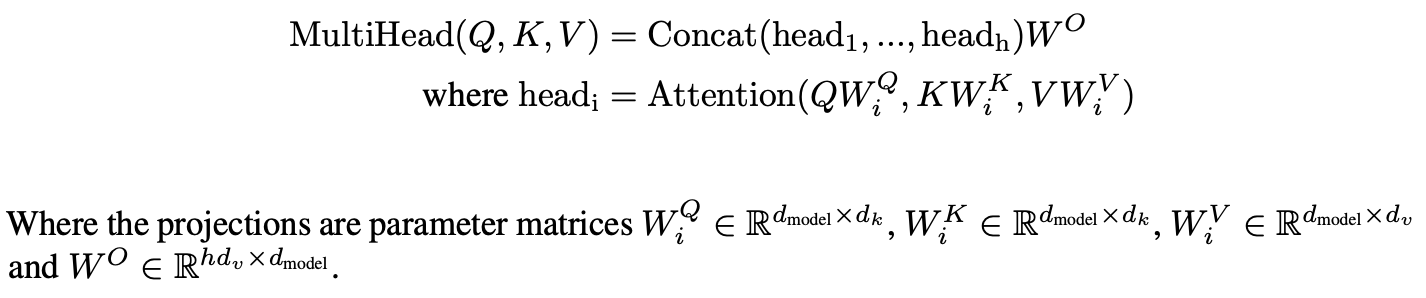
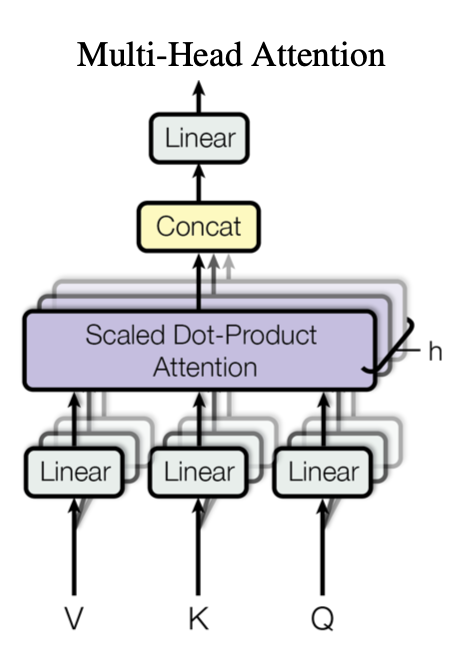

# Decoder Structure
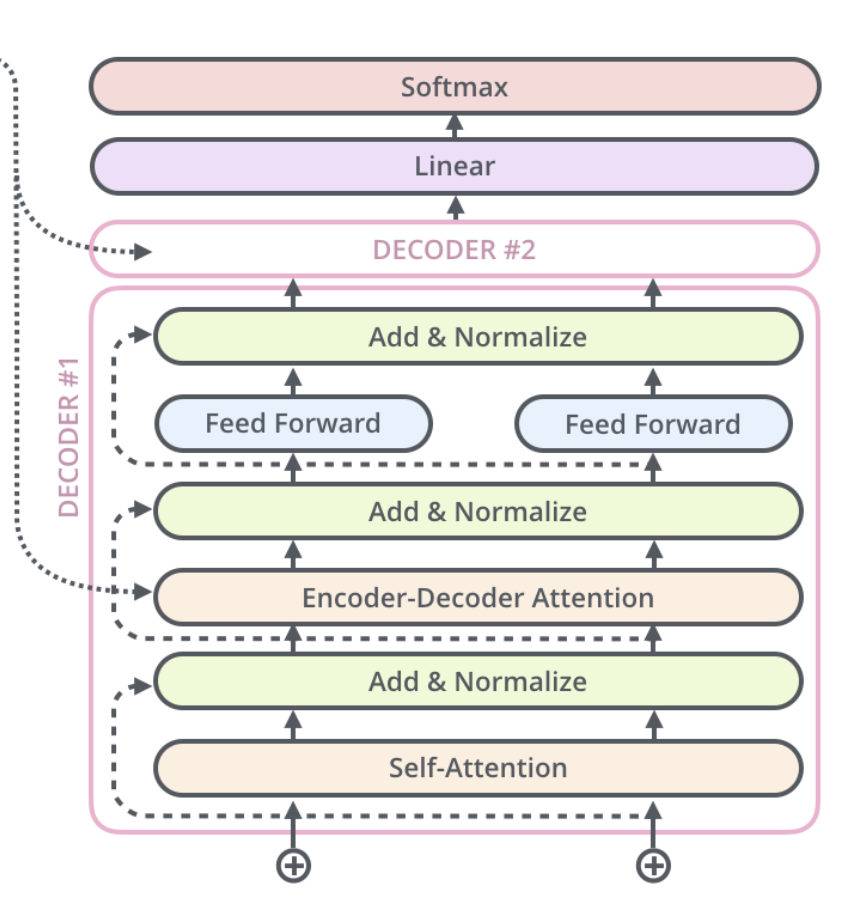

- Masked Mutil-head Attetion: mask some value, making it none-sence when parameter
   - **Padding mask**
     - used in all scaled dot-product attention
     - Align对齐:dealing with different length of text use truncating and padding截短/补足. 
     - 1: effective word; 0: ineffective word with padding.
     - If value=0, we can not put the attention in these words, negative large-abs value should be added to solve it.
     - Padding process should be done before batch sent into network
   - **Sequence mask**
     - only be used in self-attention of decoder
     - In order to prevent tag information which contain future prediction leakage to the next word's process.
     - Hide information after time t, make the decoding relies on information before t.
     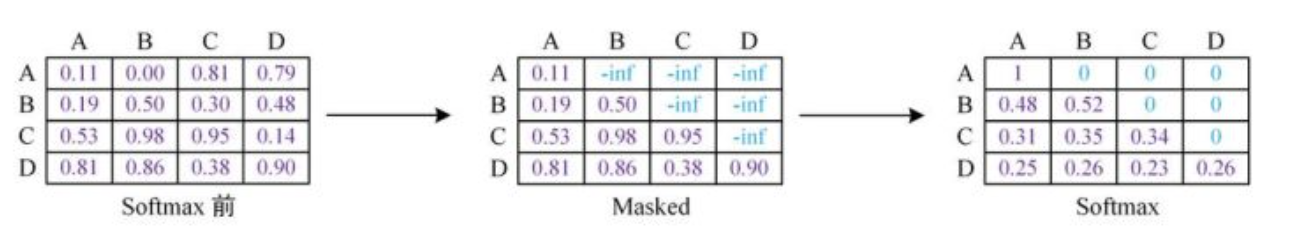

In [ ]:
#Padding Mask
def attention(query, key, value, mask=None, dropout=None):
    "Compute 'Scaled Dot Product Attention'"
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9) # mask process,-1e9 regard as negative infinite, when it pass through softmax,the probability in this position~0.
    p_attn = F.softmax(scores, dim = -1)
    if dropout is not None:
        p_attn = dropout(p_attn)
    return torch.matmul(p_attn, value), p_attn

- Output Layer: Final Linear and Softmax Layer
   -  Turn numerical vector into corresponding words
   - **Linear Layer**: fully connected netural network, producing a larger vector called `logits vector` whose each cell corresponding to the `score` of a unique word
   - **Softmax Layer**: 
     - scores → probabilities (all positive, sum up to 1).
     - the *word* associated with the cell with *highest probability* is regard as the output for the time t.

# References:

- Batch and Layer Normaslization. https://www.pinecone.io/learn/batch-layer-normalization/
- Introduction to Transformer: https://medium.com/towards-data-science/transformers-89034557de14
- Mask: https://ifwind.github.io/2021/08/17/Transformer%E7%9B%B8%E5%85%B3%E2%80%94%E2%80%94%EF%BC%887%EF%BC%89Mask%E6%9C%BA%E5%88%B6/#xlnet%E4%B8%AD%E7%9A%84mask
